In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [6]:
tesla_data = yf.Ticker("TSLA").history(period="max")
tesla_data.reset_index(inplace=True)
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://finance.yahoo.com/quote/TSLA/financials?p=TSLA'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

response = requests.get(url, headers=headers)
html_data = response.text

if response.status_code == 200:
    print("Successfully fetched the webpage")
else:
    print("Failed to retrieve the webpage")

soup = BeautifulSoup(html_data, 'html.parser')

revenue_table = soup.find('table', {'class': 'W(100%)'})

# Extract rows and revenue data
revenue_data = []
if revenue_table:
    rows = revenue_table.find_all('tr')[1:]  # Skip the header row
    for row in rows:
        cols = row.find_all('td')
        if len(cols) > 1:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            revenue_data.append([date, revenue])

#  Create a DataFrame and display the data
tesla_revenue = pd.DataFrame(revenue_data, columns=['Date', 'Revenue'])
print(tesla_revenue.head())


Successfully fetched the webpage
Empty DataFrame
Columns: [Date, Revenue]
Index: []


In [12]:
gme_data = yf.Ticker("GME").history(period="max")
gme_data.reset_index(inplace=True)
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [22]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Define the URL for GameStop's financials page
url = 'https://finance.yahoo.com/quote/GME/financials?p=GME'

# Step 2: Set headers to mimic a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Step 3: Fetch the webpage
response = requests.get(url, headers=headers)
html_data = response.text

# Step 4: Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Step 5: Find the revenue table (use the correct class or ID for the table)
revenue_table = soup.find('table', {'class': 'W(100%)'})

# Step 6: Extract the revenue data from the table
revenue_data = []
if revenue_table:
    rows = revenue_table.find_all('tr')[1:]  # Skip header row
    for row in rows:
        cols = row.find_all('td')
        if len(cols) > 1:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            revenue_data.append([date, revenue])

# Step 7: Create a DataFrame
gamestop_revenue = pd.DataFrame(revenue_data, columns=['Date', 'Revenue'])

# Display the result
print(gamestop_revenue.head())


Empty DataFrame
Columns: [Date, Revenue]
Index: []


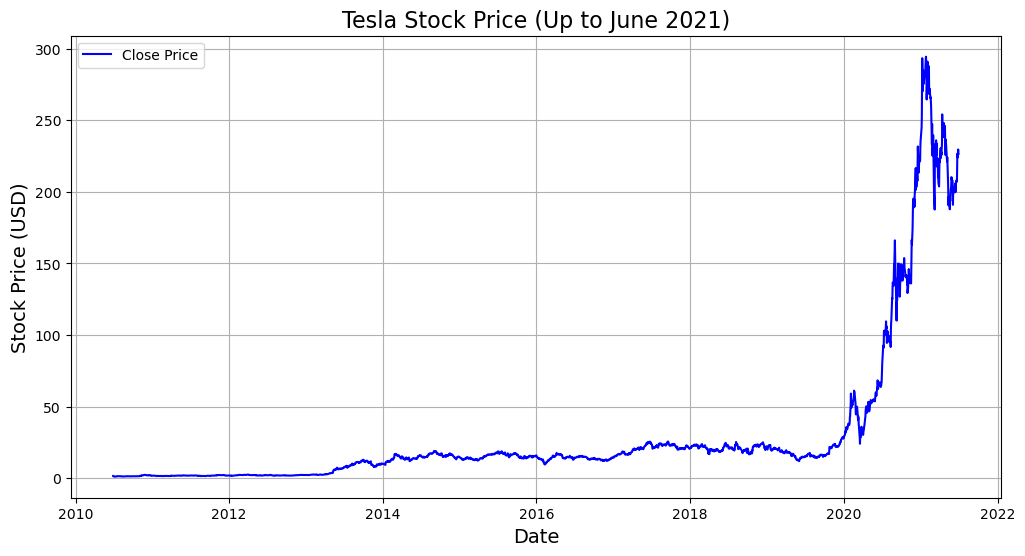

In [26]:
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(stock_data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price', color='blue')
    plt.title(title, fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Stock Price (USD)', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()
tesla = yf.Ticker("TSLA")
stock_data = tesla.history(period="max")
stock_data.reset_index(inplace=True)

stock_data = stock_data[stock_data['Date'] <= '2021-06-30']
make_graph(stock_data, "Tesla Stock Price (Up to June 2021)")

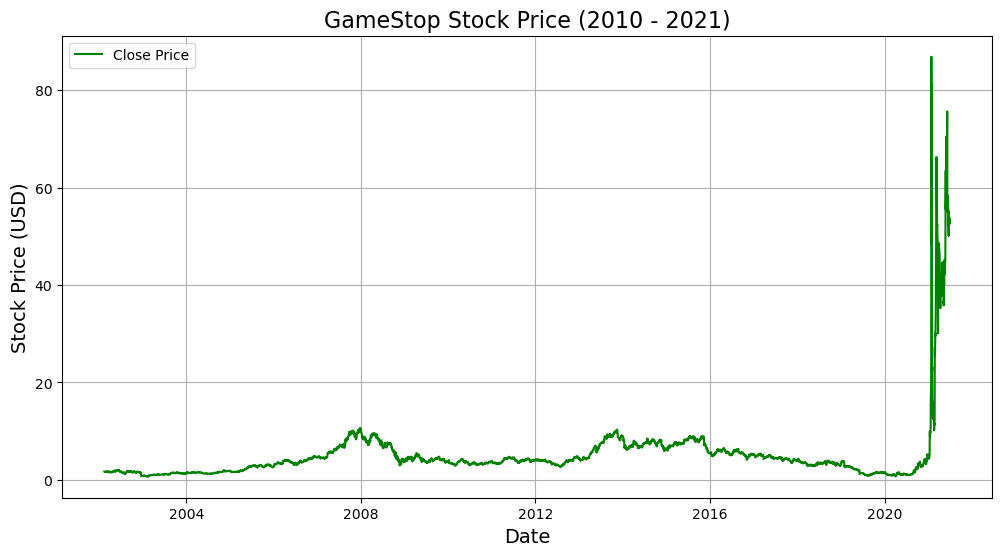

In [30]:
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(stock_data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price', color='green')
    plt.title(title, fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Stock Price (USD)', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()
gme = yf.Ticker("GME")
stock_data = gme.history(period="max")
stock_data.reset_index(inplace=True)
stock_data = stock_data[stock_data['Date'] <= '2021-06-30']

make_graph(stock_data, "GameStop Stock Price (2010 - 2021)")